In [1]:
# Tutorial on the Sapsan's built-in plotting routines.
# Depending on the routine, it can rely on matplotlib (mpl), 
# plotly (px) with pandas, or graphviz (gph). Matplotlib routines
# have a custom parameters defined in plot_params(). The routines include:
# 
#   1. line_plot   - familiar matplotlib line plotting (mpl)
#   2. slice_plot  - 2D plots (mpl)
#   3. pdf_plot    - probability density function (mpl)
#   4. cdf_plot    - cumulative distribution function (mpl)
#   5. log_plot    - training log plot (px)
#   6. model_graph - visualizing ML model layer-by-layer by constructing a graph (gph)
# 
# For all parameters of each routine check Spasan's API at sapsan-wiki.github.io

import os
import sys
import numpy as np
sys.path.append("../../")

In [2]:
# List of matplotlib parameters
# Default style is 'tableau-colorblind10'

from sapsan.utils.plot import plot_params

for parameter, value in plot_params().items():
    print(f'{parameter:21s} {value}')

font.size             14
legend.fontsize       14
axes.labelsize        20
axes.titlesize        24
xtick.labelsize       17
ytick.labelsize       17
axes.linewidth        1
patch.linewidth       3
lines.linewidth       3
xtick.major.width     1.5
ytick.major.width     1.5
xtick.minor.width     1.25
ytick.minor.width     1.25
xtick.major.size      7
ytick.major.size      7
xtick.minor.size      4
ytick.minor.size      4
xtick.direction       in
ytick.direction       in
axes.grid             True
axes.formatter.limits [-7, 7]
grid.linestyle        :
grid.color            #999999
text.usetex           False


Text(16.375000000000004, 0.5, 'f(x)')

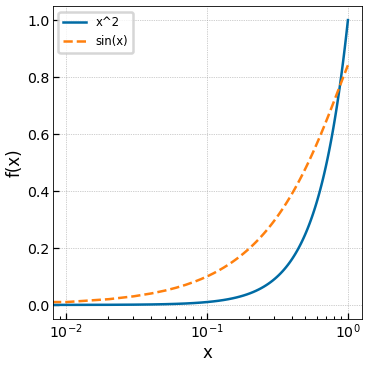

In [3]:
from sapsan.utils.plot import line_plot

# Simple line plots: we will plot two datasets [x,x2] and [x,x3]
# It exists to maintime the same plotting formatting whgen using Sapsan
x  = np.linspace(0,1,100)
x2 = x**2
x3 = np.sin(x)

# all matplotlib routines return Axis object
ax = line_plot(series    = [[x,x2],
                            [x,x3]],
               
               # other matplotlib types included: plot, semilogx, semilogy, loglog
               plot_type = 'semilogx',               
               label     = ['x^2', 'sin(x)'],
               linestyle = ['-', '--'])

# You can alter almost all aspects of the plot through Axes
# Let's add axis labels
ax.set_xlabel('x')
ax.set_ylabel('f(x)') 

In [4]:
# Majority of the routines can be used with any data,
# but for consistency, we will load the 3D cnn example data

from sapsan.lib.data import HDF5Dataset, flatten

data_loader = HDF5Dataset(path           = "data/cnn_krr/t{checkpoint:1.0f}/{feature}_dim32_fm15.h5",
                          features       = ['u'],
                          target         = ['u'],
                          checkpoints    = [0],
                          input_size     = [32,32,32],
                          train_fraction = 1)

x, y = data_loader.load_numpy()
y    = flatten(y)

# x constains 3 components if velocity 'u', 32^3 each
print(x.shape, y.shape)

Features:  ['u']
Fetures_label: ['None']
Loading 'u00000' from file 'data/cnn_krr/t0/u_dim32_fm15.h5'
----------
Loading 'u00000' from file 'data/cnn_krr/t0/u_dim32_fm15.h5'
----------
(1, 3, 32, 32, 32) (1, 98304)


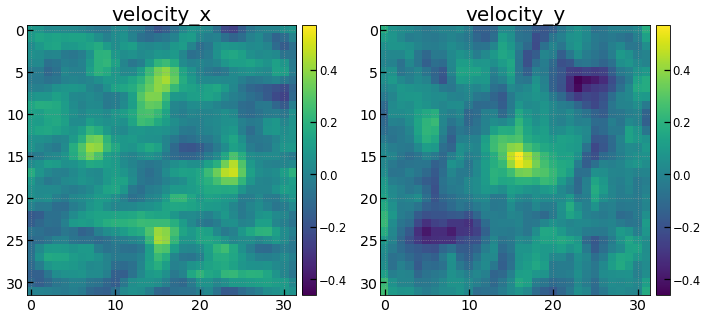

In [5]:
from sapsan.utils.plot import slice_plot

# first 32x32 slice of ux and uy components
ux = x[0,0,0]
uy = x[0,1,0]

# all matplotlib routines return Axis object
ax = slice_plot(series = [ux, uy],
                label  = ['velocity_x', 'velocity_y'])

# colormap ranges will be the same across multiple slices, based on the total min and max

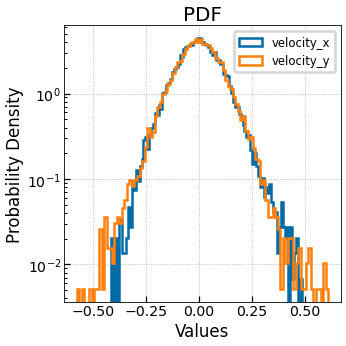

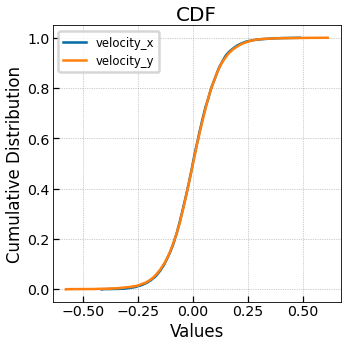

In [6]:
from sapsan.utils.plot import pdf_plot, cdf_plot

# Full 3D 32x32x32 slice of ux and uy components.
# However, it will work just fine with any data 
# dimensionality since the input gets flattened.
ux = x[0,0]
uy = x[0,1]

# Probability density function
ax = pdf_plot(series = [ux, uy],
              label  = ['velocity_x', 'velocity_y'])

# Cumulative distribution function
ax = cdf_plot(series = [ux, uy],
              label  = ['velocity_x', 'velocity_y'])

In [21]:
# Tracking the loss in training and validation is essential.
# log_plot() extracts the data from the logs into pandas DataFrame,
# and then produces interactive plots with plotly.

from sapsan.utils.plot import log_plot

class ml_logs:
    # Create and cleanup fake training logs
    def __init__(self, log_path, valid_log_path, delimiter):        
        self.log_path       = log_path
        self.valid_log_path = valid_log_path
        self.delimiter      = delimiter

    def create_logs(self):        
        train_log = np.array([[1,1.783e+02],
                              [2,1.430e+01],
                              [3,1.206e+01],
                              [4,1.187e+01],
                              [5,1.091e+01]])
        
        self.write_log(self.log_path, train_log)
            
        np.random.seed(4)
        valid_log      = train_log        
        valid_log[:,1]*= np.random.rand(len(train_log))
        
        self.write_log(self.valid_log_path, valid_log)
    
    def write_log(self, path, data):
        with open(path,'w') as f:
            np.savetxt(f, data, fmt=f'%d {self.delimiter} %.3e', 
                       delimiter=self.delimiter, header=f'epoch {self.delimiter} loss')
            
    def cleanup(self):
        os.remove(self.log_path)
        os.remove(self.valid_log_path)


log_path       = 'example_train_log.txt'
valid_log_path = 'example_valid_log.txt'
delimiter      = '\t'

# Let's create pseudo training logs
logs = ml_logs(log_path, valid_log_path, delimiter)
logs.create_logs()

# By default, epochs are assumed to be in column 0, and loss in 1.
# Those can be specified via epoch_column, train_column, and valid_column.
log = log_plot(show_log       = True,
               log_path       = log_path, 
               valid_log_path = valid_log_path, 
               delimiter      = delimiter)

# cleanup
logs.cleanup()



Train data shapes:  (1, 3, 32, 32, 32) (1, 98304)
Valid data shapes:  (1, 3, 32, 32, 32) (1, 98304)


/home/pkarpov/Sapsan/sapsan/examples/../../sapsan/utils/hiddenlayer/pytorch_builder.py:75: FutureWarning:

'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..



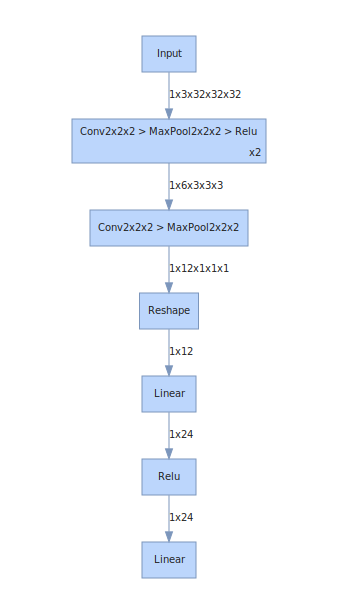

In [8]:
# Visualize the model structure with model_graph
from sapsan.lib.estimator.cnn.cnn3d_estimator import CNN3d, CNN3dConfig
from sapsan.lib.data import get_loader_shape
from sapsan.utils.plot import model_graph

# Convert our raw data to a Torch loader
loaders = data_loader.convert_to_torch([x, y])

# Initialize the model you want to make a graph of
estimator = CNN3d(config = CNN3dConfig(),
                  loaders = loaders)

# extract shapes of the loaders to initialize the graph
shape_x, shape_y = get_loader_shape(loaders)

model_graph(model = estimator.model, shape = shape_x)

/home/pkarpov/Sapsan/sapsan/examples/../../sapsan/utils/hiddenlayer/pytorch_builder.py:75: FutureWarning:

'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..



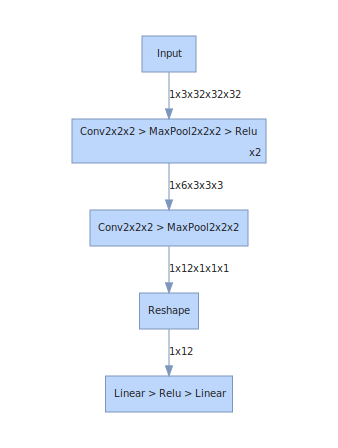

In [9]:
# To make our graph more consice, we can combine the last 3 layers
# via transforms. There are already some defaults which we will copy
# from documentation and then add an entry to combine those last layers

import sapsan.utils.hiddenlayer as hl

transforms = [
              hl.transforms.Fold("Conv > MaxPool > Relu", "ConvPoolRelu"),
              hl.transforms.Fold("Conv > MaxPool", "ConvPool"),    
              hl.transforms.Prune("Shape"),
              hl.transforms.Prune("Constant"),
              hl.transforms.Prune("Gather"),
              hl.transforms.Prune("Unsqueeze"),
              hl.transforms.Prune("Concat"),
              hl.transforms.Rename("Cast", to="Input"),
              hl.transforms.FoldDuplicates(),
              
              # combining the last 3 layers
              hl.transforms.Fold("Linear > Relu > Linear", "LRL")
             ]

model_graph(model = estimator.model, shape = shape_x, transforms = transforms)